<a href="https://colab.research.google.com/github/agaonam/public_projects/blob/main/Business_Case_Part_2_Analysis_of_a_collection_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2 – Collections Strategy Analysis  
**Business Case:** Evaluating a Contact-Based Recovery Campaign  
**Objective:** Estimate financial impact and recovery performance of targeting delinquent Contigo A customers using phone calls.  


In [16]:
import pandas as pd

# Load the Excel file from the new path
file_path = "/BA Hiring - Collections Challenge.xlsx"
df_contact = pd.read_excel(file_path, sheet_name='Contactibility')

# Preview the first few rows
df_contact.head()


,customer_id,contactability_score
0,1,0.293
1,2,0.250
2,3,0.033
3,4,0.239
4,5,0.681


In [17]:
# Calculate recovery probabilities
df_contact['recovery_probability'] = df_contact['contactability_score'] * 0.75

# KPI constants
loan_amount = 1000
interest_rate = 0.15
campaign_cost_per_customer = 30
total_customers = 675

# KPI calculations
expected_recovered_accounts = df_contact['recovery_probability'].sum()
recovered_total_debt = expected_recovered_accounts * loan_amount
interest_revenue = recovered_total_debt * interest_rate
total_campaign_cost = total_customers * campaign_cost_per_customer
dq_losses_unrecovered = (total_customers - expected_recovered_accounts) * loan_amount
collections_income = interest_revenue - total_campaign_cost

# Results summary
results = {
    'Expected Recovered Accounts': round(expected_recovered_accounts, 2),
    'Recovered Total Debt': round(recovered_total_debt, 2),
    'Interest Revenue': round(interest_revenue, 2),
    'Total Campaign Cost': round(total_campaign_cost, 2),
    'Unrecovered DQ Losses': round(dq_losses_unrecovered, 2),
    'Collections Net Income': round(collections_income, 2)
}

results


{'Expected Recovered Accounts': np.float64(212.02),
 'Recovered Total Debt': np.float64(212024.25),
 'Interest Revenue': np.float64(31803.64),
 'Total Campaign Cost': 20250,
 'Unrecovered DQ Losses': np.float64(462975.75),
 'Collections Net Income': np.float64(11553.64)}

In [18]:
# Create summary table
import pandas as pd

summary_df = pd.DataFrame({
    'Metric': [
        'Expected Recovered Accounts',
        'Recovered Total Debt',
        'Interest Revenue',
        'Total Campaign Cost',
        'Unrecovered DQ Losses',
        'Collections Net Income'
    ],
    'Value': [
        round(expected_recovered_accounts, 2),
        round(recovered_total_debt, 2),
        round(interest_revenue, 2),
        round(total_campaign_cost, 2),
        round(dq_losses_unrecovered, 2),
        round(collections_income, 2)
    ]
})

summary_df


,Metric,Value
0,Expected Recovered Accounts,212.02
1,Recovered Total Debt,212024.25
2,Interest Revenue,31803.64
3,Total Campaign Cost,20250.00
4,Unrecovered DQ Losses,462975.75
5,Collections Net Income,11553.64


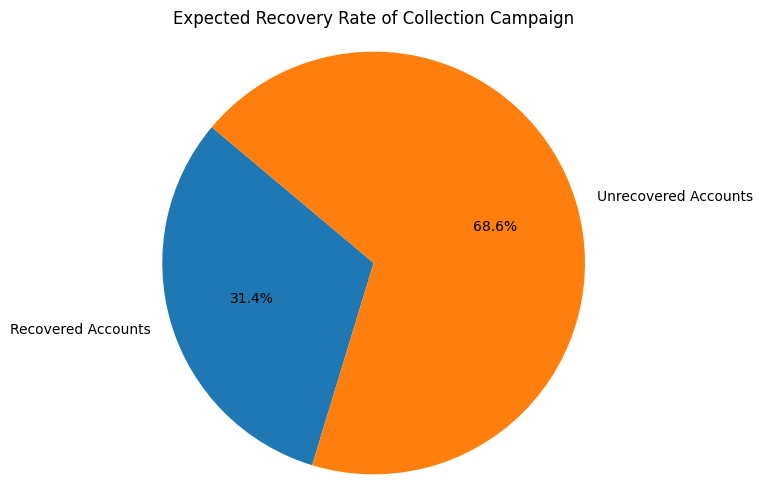

In [19]:
import matplotlib.pyplot as plt

# Pie chart: Recovered vs. Unrecovered
labels = ['Recovered Accounts', 'Unrecovered Accounts']
sizes = [expected_recovered_accounts, total_customers - expected_recovered_accounts]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Expected Recovery Rate of Collection Campaign')
plt.axis('equal')
plt.show()


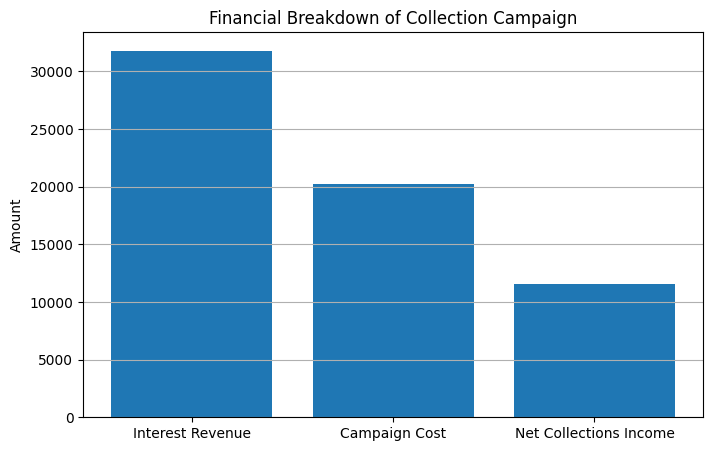

In [20]:
# Bar chart for financial results
financial_metrics = ['Interest Revenue', 'Campaign Cost', 'Net Collections Income']
financial_values = [interest_revenue, total_campaign_cost, collections_income]

plt.figure(figsize=(8,5))
plt.bar(financial_metrics, financial_values)
plt.title('Financial Breakdown of Collection Campaign')
plt.ylabel('Amount')
plt.grid(axis='y')
plt.show()


## Part 2: Collections Strategy

### Q1: What would be the result of launching this campaign?

Using the given contactability scores and assuming a 75% repayment rate for reached customers, we can estimate the following:

| KPI                                  | Value              |
|--------------------------------------|--------------------|
| Expected Recovered Accounts       | 212                |
| Recovered Total Debt              | 212,024           |
| Interest Revenue (Real Revenue)   | 31,804            |
| Total Campaign Cost               | 20,250            |
| DQ Losses from Unrecovered Debt   | 462,976           |
| Net Collections Income (Profit)   | 11,554            |

Therefore:

- The campaign hits its goal (≥175 recovered accounts)  
- It generates **positive net collections income**  
- It reduces overall DQ losses from Month 1


### Q2: What’s the impact of this campaign on overall business performance?

During the first month without collections we have:

- Net Income: -176,250
- DQ Losses: 675,000
- Interest Revenue: 648,750

Having implemented the campaign, the results move to:

- Net Income improves by 11,554
- DQ Losses drop by 212,024
- Interest Revenue increases from recovered accounts

Using the campaign as a strategy **moves the needle in the right direction**. It definitely has an impact in reducing loss and increases efficiency.

Considering that we also begin to **approach the 10% DQ threshold** needed for profitability, the campaign becomes a strategic move.


### Q3: What are some possible improvements to this campaign?

considering that the previous model is now showing a positive ROI, the recommendaton on how to optimize are:

- **Prioritize high-score customers first:** highest contactability = highest ROI
- **Segment by contact channel:** SMS or WhatsApp might work for low-score segments at lower cost
- **Call timing optimization:** Test day of week or time of day for measuring success rate differences
- **Incentivize repayment:** For borderline customers, offer interest waivers to drive fast resolution
- **Model feedback loop:** Use real repayment outcomes to refine the contactability model

The previous data shows that the campaign is effective and it's bringing positive results. So, a way to make it more efficient, would be to iterate and scale it.


## Summary: Why This Analysis Matters

This campaign shows that direct action, calling delinquent customers, delivers measurable financial value and operational impact.

By combining predictive modeling (contactability) with behavioral assumptions (75% repayment when contacted), we have a simulation that:

- Achieved its recovery goal
- Generated positive net income
- Lowered risk and DQ rate

For a business, it's always important to implement tactical, measured and data driven decisions and executions, so it can stay current in a rapid and ever changing market.
